# STUDENTS PERFORMANCE IN EXAMS - ML FINAL PROJECT

Emilia Aguirre

Juan Diego Luna

Alex Pérez

# **Introducción**

El Aprendizaje Automático se ha convertido en una herramienta esencial en distintos ámbitos pues su variedad de técnicas han permitido desarrollar patrones y relaciones en conjuntos de datos grandes. Dada su importancia y relevancia, el objetivo de este trabajo es hacer uso de estas técnicas.

Para desarrollar este notebook se emplea un dataset, obtenido de kaggle, que contiene información sobre el rendimiento de estudiantes en tres tipos de exámenes: Examen de Matemáticas, Examen de Lectura y Examen de Escritura. Uno de los principales objetivos de este proyecto es predecir las calificaciones de los estudiantes en base a las características (features) de background que se le son atribuídas. 

Entre las técnicas de implementación que se pueden encontrar en este proyecto están las siguientes: 

* **Feature Selection:** con la finalidad de seleccionar un subconjunto de características relevantes y útiles a partir de un conjunto de características grande. El objetivo de feature selection es mejorar la precisión y eficiencia del modelo.

* **Regresión Lineal Regularizada y Regresión lineal con Múltiples inputs y múltiples outputs:** útiles para modelar datos en los que puede existir una relación lineal entre las variables de entrada y de salida del dataset.

* **Repeated Stratified K-fold cross validation:** debido a su utilidad en evaluar la capacidad de generalización de un modelo. 

* **Pipelines:** para simplificar el proceso de construcción de modelos y poder atribuirles distintos parámetros.

* **Redes Neuronales:** con la finalidad de aprender patrones complejos en los datos e intentar alcanzar un alto nivel de predicción. En el contexto de este proyecto el objetivo de las redes neuronales era optimizar su rendimiento (optimizar las capas ocultas y el número de neuronas de cada capa). Para esto se realizaron las redes neuronales con Pipelines para cada una de las asignaturas usando las bibliotecas de Keras y Scikit-learn. 

* **Para la optimización se hizo la busqueda de hiperparámetros con GridSearchCV.**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
# reading the csv file
dataset = "https://raw.githubusercontent.com/Negatix092/Machine-Learning/main/ML_Class_Spring_2023/Proyecto_Final/StudentsPerformance.csv"
df = pd.read_csv(dataset)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Dataset

Este dataset tiene un total de datos correspondiente a 1000 alumnos, con 5 características de los mismos. Los outputs que nos interesan son 3 y representan las últimas 3 filas del dataset: calificación de matemáticas, calificación de lectura y calificación de escritura.

#Detalle del Dataset

* ```gender``` -- ['male', 'female']
* ```race/ethnicity``` -- ['group A', 'group B', 'group C', 'group D', 'group E']
* ```parental level of education``` -- ['some high school', 'high school', "bachelor's degree", 'some college', "master's degree", "associate's degree"]
* ```lunch``` -- ['standard', 'free/reduced']
* ```test preparation course``` -- ['none', 'completed']
* ```math score``` - Student unique math score
* ```reading score``` - Student unique reading score
* ```writing score``` - Student unique writin score


In [4]:
#preparacion del dataset
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#outputs
score_output_Math = 'math score'
score_output_Reading = 'reading score'
score_output_Writing = 'writing score'

#en la lista binary_feat se almacenan los nombres de las columnas (del dataset) que solamente tienen dos valores diferentes.
binary_feat = df.nunique()[df.nunique() == 2].keys().tolist()
#en la lista numeric_feat se almacenan los nombres de las columnas (del dataset) que solamente contienen datos numericos, sean tipo int o float, y que no tienen solo dos valores diferentes
numeric_feat = [col for col in df.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
#en la lista categorical_feat se almacenan los nombres de las columnas (del dataset) que tienen datos no numericos y que no tienen solo dos valores diferentes.
categorical_feat = [ col for col in df.select_dtypes('object').columns.to_list() if col not in binary_feat + numeric_feat ]
#una copa del dataframe (dataset) se almacena en un nuevo dataframe para trabajarlo, df_proc
df_proc = df.copy()

#Etiquetas para características binarias
#aqui se transforman los binary features (solo dos valores diferentes) a valores numericos usando LabelEncoder
le = LabelEncoder()
for i in binary_feat:
  df_proc[i] = le.fit_transform(df_proc[i])
  print(i, '\n', np.unique(df_proc[i].values))

def get_df_size(df, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', df.shape[1], 
        '\n# Entries: ', df.shape[0],'\n')
  
#Dummy variables
#se crean variables dummy para las categorical features
#a cada categorical feature se la convierte en multiples binary features, con un valor posible (0 o 1) para cada categorical feature original
# es decir, one-hot encoding se aplica a las categorical features
get_df_size(df_proc, header='Processed dataset before dummies:')
df_proc = pd.get_dummies(df_proc, columns=categorical_feat)
get_df_size(df, header='Original dataset:')
get_df_size(df_proc, header='Processed dataset:')
df_proc.head()

gender 
 [0 1]
lunch 
 [0 1]
test preparation course 
 [0 1]
Processed dataset before dummies: 
# Attributes:  8 
# Entries:  1000 

Original dataset: 
# Attributes:  8 
# Entries:  1000 

Processed dataset: 
# Attributes:  17 
# Entries:  1000 



,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,69,90,88,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,90,95,93,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,47,57,44,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,76,78,75,0,0,1,0,0,0,0,0,0,1,0


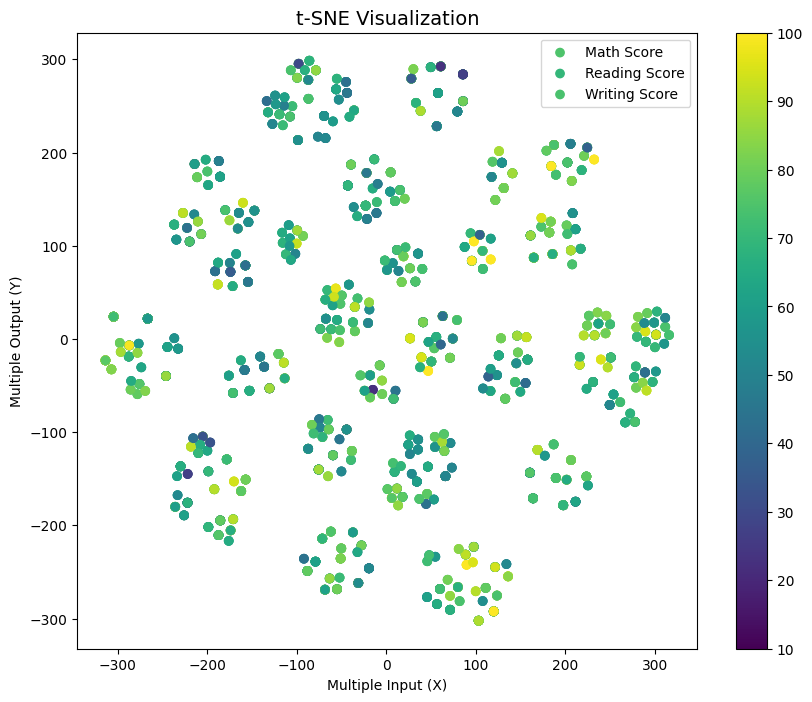

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Seleccionamos las columnas que vamos a utilizar
#X = df_proc.iloc[:, [0,1,2,6,7,8,9,10,11,12,13,14,15,16]].values
x=df_proc
X=df_proc.drop(columns =['math score','reading score','writing score'], axis=1)
#y = df_proc.iloc[:, 3:6].values

from scipy.stats import zscore

X_normalized = X.apply(zscore)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_normalized)

# Get the indices of the output columns
output_indices = [3, 4, 5]
output_labels = ['Math Score', 'Reading Score', 'Writing Score']

# Plot the data points with different colors for each output column
plt.figure(figsize=(10, 8))
for i in range(len(output_indices)):
    idx = output_indices[i]
    il = output_labels[i]
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=x.iloc[:, idx].values, cmap='viridis', label=f'{il}')
plt.colorbar()
plt.title('t-SNE Visualization', fontsize=14)
plt.xlabel('Multiple Input (X)')
plt.ylabel('Multiple Output (Y)')
plt.legend()
plt.show()



[1]


[2] 

# Punto 1: Multiple Input & Only One Output

In [6]:
# inputs y outputs
math_score_Y = df_proc['math score']
reading_score_Y = df_proc['reading score']
writing_score_Y = df_proc['writing score']

all_X=df_proc.drop(columns =['math score','reading score','writing score'], axis=1)

#all_Y=df_proc['math score','reading score', 'writing score']

# Dividimos el conjunto de entrenamiento y test
all_X_values_train = all_X[:-200] 
all_X_values_test = all_X[-200:] #last 200 for test

#split the targets into training/testing sets
math_score_Y_train = math_score_Y[:-200]
math_score_Y_test = math_score_Y[-200:] 

#split the targets into training/testing sets
writing_score_Y_train = writing_score_Y[:-200]
writing_score_Y_test = writing_score_Y[-200:] 

#split the targets into training/testing sets
reading_score_Y_train = reading_score_Y[:-200]
reading_score_Y_test = reading_score_Y[-200:] 

In [7]:
all_X_values_train.shape

(800, 14)

In [8]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import ttest_rel

#tenemos que usar pipelines, entonces cada tecnica de ML tendra su pipeline
#como uno de los requisitos es que al menos una tecnica de ML sea Regresion Lineal Regularizada
#hacemos el pipe para Lasso
# define pipelines

pipeline_L = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('poly', PolynomialFeatures()),
    #('feature_selection', SelectFromModel(Lasso())),
    ('model', Lasso())
])

#hacemos el pipe para Ridge, con el fin de compararlo con Lasso
pipeline_R = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('poly', PolynomialFeatures()),
    #('feature_sel', SelectFromModel(Lasso())),
    ('model', Ridge())
])

#estos parametros son necesarios para realizar la optimizacion del modelo(encontrar los mejores hiperparametros)
p_L = {'selector__k': range(1, 15),
       'poly__degree':[0,1,2], 
       'model__alpha': [0.1, 1, 10, 100],
       'model__max_iter': [1000, 5000],
       'model__tol': [1e-3, 1e-5]}

p_R = {'selector__k': range(1, 15),
       'poly__degree':[0,1,2], 
       'model__alpha': [0.1, 1, 10, 100],
       'model__max_iter': [1000, 5000],
       'model__tol': [1e-3, 1e-5]}

#repeated k-fold cross validation
#Consulte qué quiere decir estratificado y por qué usted debe o no usarlo en su problema
#
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=26)

#se usa grid search para optimizar los parametros, el conjunto de validacion se utiliza repeated stratified k fold
lasso_search = GridSearchCV(pipeline_L, p_L, cv=cv, scoring='neg_mean_squared_error')
ridge_search = GridSearchCV(pipeline_R, p_R, cv=cv, scoring='neg_mean_squared_error')

#se hace el fit de cada regresion
result_lasso = lasso_search.fit(all_X_values_train, math_score_Y_train)
result_ridge = ridge_search.fit(all_X_values_train, math_score_Y_train)

#se quiere encontrar los mejores hiperparametros
best_hp_lasso = result_lasso.best_params_
best_hp_ridge = result_ridge.best_params_
print("Los mejores hiperparámetros para Lasso son:", best_hp_lasso)
print("Los mejores hiperparámetros para Ridge son:", best_hp_ridge) 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Los mejores hiperparámetros para Lasso son: {'model__alpha': 0.1, 'model__max_iter': 1000, 'model__tol': 1e-05, 'poly__degree': 1, 'selector__k': 14}
Los mejores hiperparámetros para Ridge son: {'model__alpha': 10, 'model__max_iter': 1000, 'model__tol': 0.001, 'poly__degree': 1, 'selector__k': 14}


In [9]:
math_score_Y_train.shape

(800,)



[3] 

[4] 

[5] 

In [10]:
from sklearn.model_selection import cross_val_score
#conociendo ya los modelos con sus mejores parametros, se vuelve a definir sus pipelines
pipeline_L_best = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=best_hp_lasso['selector__k'])),
    ('poly', PolynomialFeatures(degree=best_hp_lasso['poly__degree'])),
    ('model', Lasso(alpha=best_hp_lasso['model__alpha'], max_iter=best_hp_lasso['model__max_iter'], tol=best_hp_lasso['model__tol']))
    #('model', Lasso(alpha=best_hp_lasso['model__alpha']))
])

#hacemos el pipe para Ridge, con el fin de compararlo con Lasso
pipeline_R_best = Pipeline([
    
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=best_hp_ridge['selector__k'])),
    ('poly', PolynomialFeatures(degree=best_hp_ridge['poly__degree'])),
    ('model', Ridge(alpha=best_hp_ridge['model__alpha'], max_iter=best_hp_ridge['model__max_iter'], tol=best_hp_ridge['model__tol']))
    #('model', Ridge(alpha=best_hp_ridge['model__alpha']))
])

#se desea usar RepeatedStratifiedKfold crossvalidation
rskf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2, random_state=26)

lasso_scores = cross_val_score(pipeline_L_best, all_X_values_train, math_score_Y_train, cv=rskf)
ridge_scores = cross_val_score(pipeline_R_best, all_X_values_train, math_score_Y_train, cv=rskf)

print("Lasso: %0.2f (+/- %0.2f)" % (lasso_scores.mean(), lasso_scores.std() * 2))
print("Ridge: %0.2f (+/- %0.2f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Lasso: 0.22 (+/- 0.12)
Ridge: 0.22 (+/- 0.12)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[5]



[6] 


In [11]:
from scipy.stats import wilcoxon

#diferencia entre cross_val_scores de lasso y ridge
score_diff = lasso_scores - ridge_scores

#con la diferencia se hace el test de wilcoxon
statistic, pvalue = wilcoxon(score_diff)

print("Test de Wilcoxon:")
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

# interpret
alpha = 0.05
if pvalue > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Test de Wilcoxon:
Statistic: 27.0
P-value: 1.0
Same distribution (fail to reject H0)


[6]

In [12]:
from scipy.stats import ttest_rel

#Es posible usar ttest_rel en lugar de wilcoxon
#se obtiene el t_value y el p_value
#t_value es la diferencia entre las medias de los scores dividida por la desviacion estandar de la diferencia
#p_value es la probabilidad de que la diferencia entre las medias sea 0.05
t_value, p_value = ttest_rel(lasso_scores, ridge_scores)

print("t-value:", t_value)
print("p-value:", p_value)
# interpret
alpha = 0.05
if p_value > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

t-value: -0.5374167752823499
p-value: 0.6040111423997045
Same distribution (fail to reject H0)


[7]

Lasso metrics

MSE: 176.91955337171063
R2 score: 0.27480097814514415
RMSE: 13.301110982610085

Ridge metrics

MSE: 176.70985517663857
R2 score: 0.27566053788884015
RMSE: 13.293225913097189


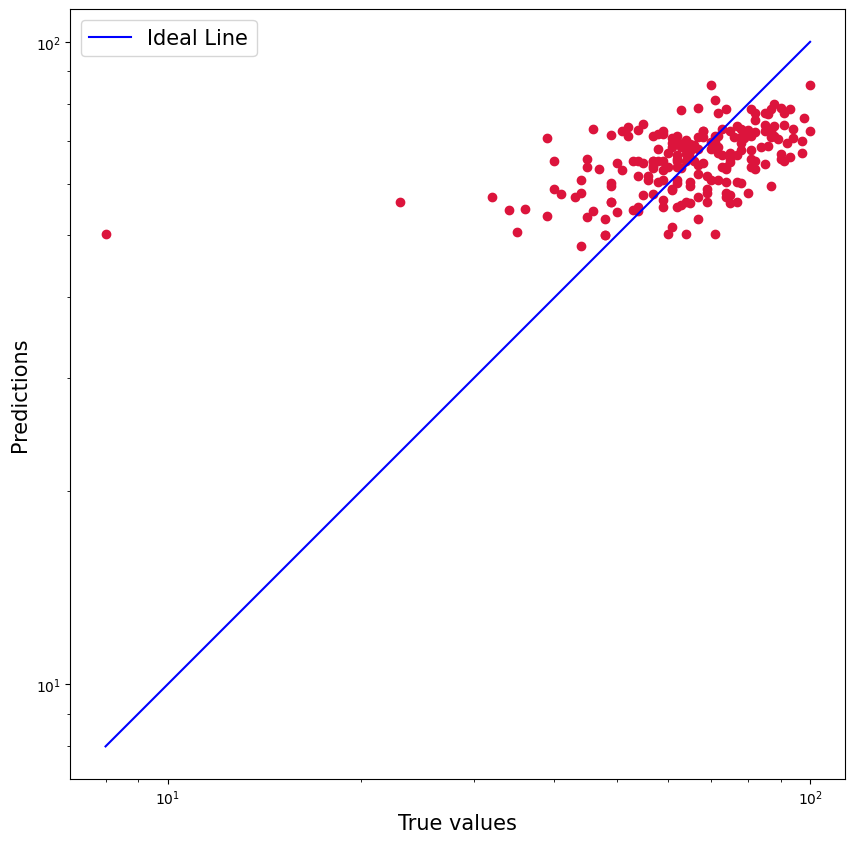

In [19]:
#se importan las metricas de sklearn
from sklearn.metrics import mean_squared_error, r2_score

#se reentrena con los mejores hiperparametros encontrados
pipeline_L_best.fit(all_X_values_train, math_score_Y_train)
pipeline_R_best.fit(all_X_values_train, math_score_Y_train)

# Make predictions on the test set for both models
lasso_preds = pipeline_L_best.predict(all_X_values_test)
ridge_preds = pipeline_R_best.predict(all_X_values_test)

# Calculate the MSE for both models
lasso_mse = mean_squared_error(math_score_Y_test, lasso_preds)
ridge_mse = mean_squared_error(math_score_Y_test, ridge_preds)

# Calculate the R2 score for both models
lasso_r2 = r2_score(math_score_Y_test, lasso_preds)
ridge_r2 = r2_score(math_score_Y_test, ridge_preds)

# Calculate the RMSE for both models
lasso_rmse = mean_squared_error(math_score_Y_test, lasso_preds, squared=False)
ridge_rmse = mean_squared_error(math_score_Y_test, ridge_preds, squared=False)

print("Lasso metrics")
print(f"\nMSE: {lasso_mse}")
print(f"R2 score: {lasso_r2}")
print(f"RMSE: {lasso_rmse}")

print("\nRidge metrics")
print(f"\nMSE: {ridge_mse}")
print(f"R2 score: {ridge_r2}")
print(f"RMSE: {ridge_rmse}")

#se grafica el error
plt.figure(figsize=(10, 10))
plt.scatter(math_score_Y_test, ridge_preds, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = np.amax([np.amax(ridge_preds), np.amax(math_score_Y_test)])
p2 = np.amin([np.amin(ridge_preds), np.amin(math_score_Y_test)])
plt.plot([p1, p2], [p1, p2], 'b-', label = 'Ideal Line')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(fontsize=15)
plt.show()

# Punto 2: Multiple Inputs & Multiple Outputs

In [14]:
# inputs y outputs
math_score_Y = df_proc['math score']
reading_score_Y = df_proc['reading score']
writing_score_Y = df_proc['writing score']

all_X=df_proc.drop(columns =['math score','reading score','writing score'], axis=1)

all_Y = df_proc.iloc[:, 3:6].values

# Dividimos el conjunto de entrenamiento y test
all_X_values_train = all_X[:-200] 
all_X_values_test = all_X[-200:] #last 200 for test

#split the targets into training/testing sets
#math_score_Y_train = math_score_Y[:-200]
#math_score_Y_test = math_score_Y[-200:] 
all_Y_values_train = all_Y[:-200] 
all_Y_values_test = all_Y[-200:] #last 200 for test

In [15]:
all_Y_values_train.shape

(800, 3)

In [16]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Create a pipeline for the Ridge regression with feature selection
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('poly', PolynomialFeatures()),
    ('regressor', Ridge())
])

# Create a dictionary of hyperparameters for the pipeline
ridge_hyperparameters = {
    'estimator__selector__k': range(1, 15),
    'estimator__poly__degree':[0,1,2],
    'estimator__regressor__alpha': [0.1, 1.0, 10.0, 100]
}

# Create a MultiOutputRegressor wrapper around the Ridge pipeline for multiple output regression
multi_output_ridge_pipeline = MultiOutputRegressor(ridge_pipeline)

cvm = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=26)

# Create a grid search object with cross-validation for hyperparameter tuning
ridge_grid_search = GridSearchCV(multi_output_ridge_pipeline, ridge_hyperparameters, cv=5, scoring='r2')

result_ridge = ridge_grid_search.fit(all_X_values_train, all_Y_values_train)

#se quiere encontrar los mejores hiperparametros
best_hp_mridge = result_ridge.best_params_
print("Los mejores hiperparámetros para Multi-Ridge son:", best_hp_mridge)

Los mejores hiperparámetros para Multi-Ridge son: {'estimator__poly__degree': 1, 'estimator__regressor__alpha': 10.0, 'estimator__selector__k': 14}


[8]

[9]

Multi-Ridge metrics

Mean squared error: 175.31
RMean squared error: 13.24
Mean absolute error: 10.74
R2 score: 0.26


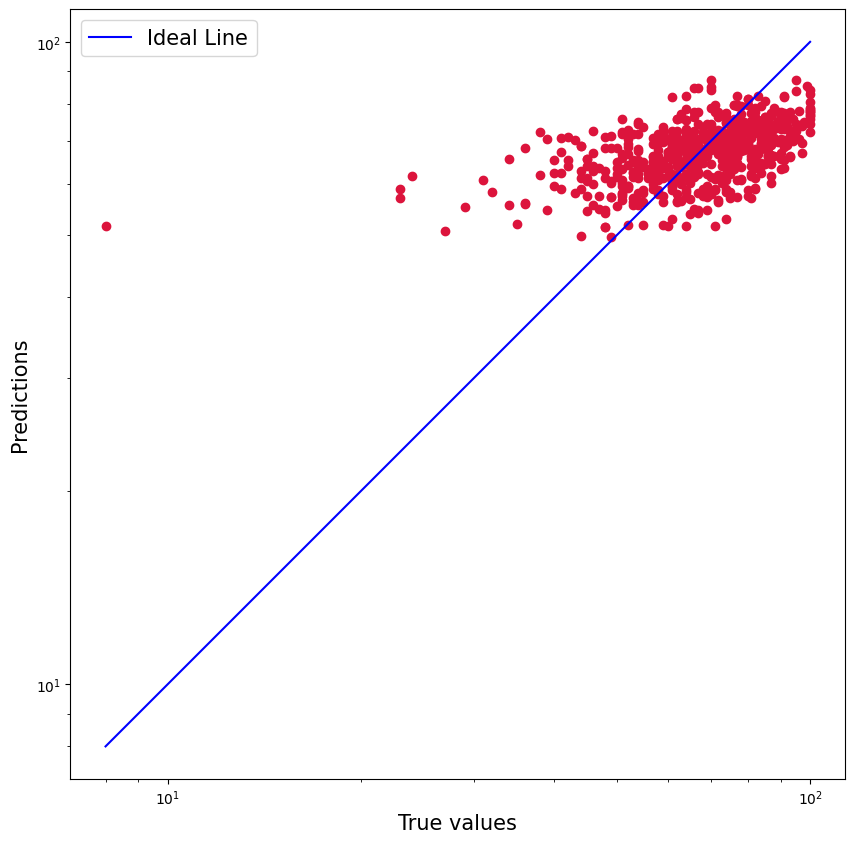

In [18]:
#conociendo los mejores hiperparametros del modelo, se crea el modelo con esos hiperparametros
best_mridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k=14)),
    ('poly', PolynomialFeatures(degree=1)),
    ('regressor', Ridge(alpha=100))
])

# Create a MultiOutputRegressor wrapper around the Ridge pipeline for multiple output regression
best_multi_output_ridge_pipeline = MultiOutputRegressor(best_mridge_pipeline)

#se entrena el modelo
best_multi_output_ridge_pipeline.fit(all_X_values_train, all_Y_values_train)

#se hacen las predicciones
all_Y_values_pred = best_multi_output_ridge_pipeline.predict(all_X_values_test)

#se calcula el error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import math 

print("Multi-Ridge metrics")
print("\nMean squared error: %.2f" % mean_squared_error(all_Y_values_test, all_Y_values_pred))
print("RMean squared error: %.2f" % math.sqrt(mean_squared_error(all_Y_values_test, all_Y_values_pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(all_Y_values_test, all_Y_values_pred))
print('R2 score: %.2f' % r2_score(all_Y_values_test, all_Y_values_pred))

#se grafica el error
plt.figure(figsize=(10, 10))
plt.scatter(all_Y_values_test, all_Y_values_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = np.amax([np.amax(all_Y_values_pred), np.amax(all_Y_values_test)])
p2 = np.amin([np.amin(all_Y_values_pred), np.amin(all_Y_values_test)])
plt.plot([p1, p2], [p1, p2], 'b-', label = 'Ideal Line')
plt.xlabel('True values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(fontsize=15)
plt.show()

In [22]:
#se calcula el pvalue usando el Wilcoxon test
mstatistic, mp_value = wilcoxon(ridge_preds,all_Y_values_pred[:, 0])#solo consideramos la primera columna de all_Y_values_pred (la columna de Math)

print("Test de Wilcoxon:")
print(f"Statistic: {mstatistic}")
print(f"P-value: {mp_value}")

# interpret
alpha = 0.05
if mp_value > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Test de Wilcoxon:
Statistic: 9478.0
P-value: 0.4852093110442015
Same distribution (fail to reject H0)


In [27]:
# Reshape ridge_preds to have the same shape as ridge_preds
ridge_preds_reshaped = ridge_preds.reshape(-1, 1).repeat(3, axis=1)

# Calculate the t-statistic and p-value for the paired t-test
mt_statistic, mtp_value = ttest_rel(ridge_preds_reshaped, all_Y_values_pred)

print("t-value:", mt_statistic)
print("p-value:", mtp_value)
# interpret
alpha = 0.05
if np.amax(mtp_value) > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

t-value: [-1.04124813 -7.59575454 -4.05461538]
p-value: [2.99023769e-01 1.16872685e-12 7.20329786e-05]
Same distribution (fail to reject H0)



# Punto 3: Neural Networks

### Optimizando el número de capas ocultas y el número de neuronas

In [ ]:
# inputs y outputs
math_score_Y = df_proc['math score']
reading_score_Y = df_proc['reading score']
writing_score_Y = df_proc['writing score']

all_X=df_proc.drop(columns =['math score','reading score','writing score'], axis=1)

all_Y = df_proc.iloc[:, 3:6].values

# Dividimos el conjunto de entrenamiento y test
all_X_values_train = all_X[:-200] 
all_X_values_test = all_X[-200:] #last 200 for test

#split the targets into training/testing sets
#math_score_Y_train = math_score_Y[:-200]
#math_score_Y_test = math_score_Y[-200:] 
all_Y_values_train = all_Y[:-200] 
all_Y_values_test = all_Y[-200:] #last 200 for test

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error, make_scorer

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_X_values_train)# scaler fit is just for training dataset 
all_X_values_train_normalized = scaler.transform(all_X_values_train) #normalize training set

# Crear un modelo de Keras para utilizar en la búsqueda de Grid
def create_model(neurons=1, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=all_X_values_train_normalized.shape[1], activation='relu'))
    # Agregar una cantidad de capas ocultas igual a
    # hidden_layers, cada una con 'neurons' neuronas
    for i in range(hidden_layers):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(3, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Crear un pipeline para el modelo de Keras
model_math = Pipeline([
    ('keras', KerasRegressor(build_fn=create_model, verbose=0))
])

print(get_scorer_names())

# Definir una lista de los valores que se probarán para 
# el número de neuronas y el número de capas ocultas
param_grid = {'keras__neurons': [5, 15, 25, 50, 75], 'keras__hidden_layers': [1, 2, 3]}

# Aplicar el GridSearchCV con Pipeline y el RepeatedStratifiedKFold
grid_math = GridSearchCV(estimator=model_math, param_grid=param_grid, verbose=4, scoring = 'neg_mean_absolute_error')


grid_result = grid_math.fit(all_X_values_train_normalized, all_Y_values_train)

# Mostrar los resultados de la búsqueda de Grid para cada materia

print("Para el modelo de neural networks:")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
    
print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

<ipython-input-28-d3b80db17790>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('keras', KerasRegressor(build_fn=create_model, verbose=0))


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

[10]

# **Conclusiones**

### **Regresión Lineal Regularizada (Multiple Inputs - One Output)**

Tras hacer uso de Pipelines y GridSearchCV se concluye que los mejores hiperparámetros para el modelo de regresión  son: 

* Lasso -> $\alpha$ = 0.1, iteraciones = 1000, tolerancia: 1e-05, grado del polinomio = 1, features selected =  14. 
* Ridge -> $\alpha$ = 10, iteraciones = 1000, tolerancia: 1e-03, grado del polinomio = 1, features selected =  14. 

Tras hacer uso del test de Wilcoxon y del TTest, se concluye que, dado $\alpha$ = 0.05 y una hipótesis nula de que no existe evidencia de una diferencia significativa entre modelos:

* Wilcoxon -> para un p-value de 1.0 ($>\alpha$), no se rechaza la hipótesis nula.
* Ttest -> para un p-value de 0.6040 ($>\alpha$), no se rechaza la hipótesis nula.

### **Regresión Lineal (Multiple Inputs - Multiple Outputs)**

Tras hacer uso de Pipelines y GridSearchCV se concluye que los mejores hiperparámetros para el modelo de multi-regresión con múltiples outputs son: 

* Ridge -> $\alpha$ = 10, iteraciones = 1000, tolerancia: 1e-03, grado del polinomio = 1, features selected =  14. 

Tras hacer uso del test de Wilcoxon y del TTest, se concluye que, dado $\alpha$ = 0.05 y una hipótesis nula de que no existe evidencia de una diferencia significativa entre modelos:

* Wilcoxon -> para un p-value de 0.4852 ($>\alpha$), no se rechaza la hipótesis nula.
* Ttest -> para un p-value (maximo) de 0.2990 ($>\alpha$), no se rechaza la hipótesis nula.


### **Redes Neuronales**
Para este proyecto el objetivo de las redes neuronales era optimizar su rendimiento (optimizar las capas ocultas y el número de neuronas de cada capa. Para esto se realizaron las redes neuronales con Pipelines para cada una de las asignaturas usando las bibliotecas de Keras y Scikit-learn. Para la optimización se hizo la busqueda de hiperparámetros con GridSearchCV. Validamos el modelo utilizando el Kfold-cross validation.

Cuando optimizamos las capas ocultas y el número de neuronas. Probamos con 1, 2 o 3 capas ocultas. Cada una con 5, 15, 25, 50 y 75 neuronas. El resultado varió en el número de capas de la red de cada asignatura (matemáticas con 1, reading con 2 y writing con 3) mientras que el número de neuronas se mantuvo óptimo en 75. Como se trataba de un problema de regresión, la capa de salida solo fue una que tiene como función de activación la función sigmoide. El optimizador que usamos fue Adam, que tras prueba y error, fue el que mejor rendimiento tuvo. Como loss function tuvimos el mse que mide el error promedio entre las predicciones que hace el modelo con las etiquetas.

Finalmente, obtuvimos los resultados de la busqueda de los mejores hiperparámetros (# de capas y # de neuronas) y realizamos la prueba de hipótesis para hallar el valor p.

# Referencias

[1] P. Jain, "T-SNE Implementation in R & Python," Analytics Vidhya, Jan. 2017. [Online]. Disponible: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/. [Fecha de acceso: Mayo 10, 2023].

[2] C. Chen, "An Introduction to t-SNE with Python (Example)," Towards Data Science, Jul. 18, 2019. [Online]. Disponible en: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1. [Fecha de Acceso: Mayo 10, 2023]

[3] "Model evaluation: quantifying the quality of predictions," Scikit-learn. [Online]. Disponible en: https://scikit-learn.org/stable/modules/model_evaluation.html. [Fecha de Acceso: Mayo 10, 2023].

[4] R. Sharma, "Scikit-Learn Pipeline Tutorial with Parameter Tuning and Cross-Validation," Towards Data Science, Feb. 18, 2020. [Online]. Disponible en: https://towardsdatascience.com/scikit-learn-pipeline-tutorial-with-parameter-tuning-and-cross-validation-e5b8280c01fb. [Fecha de Acceso: Mayo 10, 2023].

[5] "sklearn.model_selection.RepeatedStratifiedKFold," Scikit-learn. [Online]. Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold. [Fecha de Acceso: Mayo 10, 2023].

[6] "scipy.stats.wilcoxon," SciPy v1.7.1 Reference Guide. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html. [Fecha de Acceso: May. 10, 2023].

[7] "scipy.stats.ttest_rel." SciPy v1.7.1 Reference Guide. [Online]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html. [Fecha de Acceso: Mayo 10, 2023].

[8] “Example of Multiple Linear [1]R. N. Sucky, “Multivariate Linear Regression in Python Step by Step,” Medium, Oct. 26, 2020. https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171
‌Regression in Python - Data to Fish,” datatofish.com. https://datatofish.com/multiple-linear-regression-python/

[9] “How to implement Multivariable Regression in Python,” Educative: Interactive Courses for Software Developers. https://www.educative.io/answers/how-to-implement-multivariable-regression-in-python# (accessed May 10, 2023).
‌[1]SciKit-Learn, “3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.21.3 documentation,” Scikit-learn.org, 2009. https://scikit-learn.org/stable/modules/cross_validation.html

[10] J. Brownlee, “Use Keras Deep Learning Models with Scikit-Learn in Python,” MachineLearningMastery.com, May 30, 2016. https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/